# Main module
It is written in Jupyter Noteboook for better look

## Preparation

In [1]:
# install frozendict

%pip install frozendict

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import some stuff for jupyter

%matplotlib inline 
import matplotlib.pyplot as plt

In [3]:
# Import library modules

from binascii import crc32

In [4]:
# Import third party modules

import pandas as pd

In [5]:
# Import project files

from Generate.Generate import generate_dataset
from Utility.functions import *
from Utility.data import *
from Utility.test import run_all_tests
from Encrypt import *

In [6]:
# Test helper functions

assert(run_all_tests())

All 6 tests passed
Time elapsed: 0 sec, 161 msec


## Data preparation

In [7]:
words = generate_dataset(file_name)

Time elapsed: 0 sec, 270761 msec


In [8]:
print("Set 'words' contains {} elements".format(len(words)))

Set 'words' contains 420394 elements


In [9]:
caesar_3 = Caesar.encrypt(words, 3)
caesar_4 = Caesar.encrypt(words, 4)
caesar_5 = Caesar.encrypt(words, 5)

Time elapsed: 0 sec, 808231 msec
Time elapsed: 0 sec, 804068 msec
Time elapsed: 0 sec, 797858 msec


In [10]:
affine_3_4  = Affine.encrypt(words, 3, 4)
affine_5_2  = Affine.encrypt(words, 5, 2)
affine_9_11 = Affine.encrypt(words, 9, 11)

Time elapsed: 0 sec, 836025 msec
Time elapsed: 0 sec, 812870 msec
Time elapsed: 0 sec, 804421 msec


## Some hypotheses

There are different ways to build classifier:

- try to calculate some unique number for each word
and build classifier based on these numbers

- vectorize words and build classifier based on vectors

### Number calculation

In [11]:
d_caesar_3 = map_codes_and_words(caesar_3, crc32, custom_hash)
d_caesar_4 = map_codes_and_words(caesar_4, crc32, custom_hash)
d_caesar_5 = map_codes_and_words(caesar_5, crc32, custom_hash)

Time elapsed: 2 sec, 43238 msec
Time elapsed: 1 sec, 991194 msec
Time elapsed: 2 sec, 6118 msec


In [12]:
d_affine_3_4  = map_codes_and_words(affine_3_4, crc32, custom_hash)
d_affine_5_2  = map_codes_and_words(affine_5_2, crc32, custom_hash)
d_affine_9_11 = map_codes_and_words(affine_9_11, crc32, custom_hash)

Time elapsed: 2 sec, 17455 msec
Time elapsed: 1 sec, 984100 msec
Time elapsed: 1 sec, 994658 msec


In [13]:
intersections = list()

# caesar 3 and caesar 4
intersections.append(len(calculate_intersection(d_caesar_3, d_caesar_4)))       # (1)
# caesar 3 and caesar 5
intersections.append(len(calculate_intersection(d_caesar_3, d_caesar_5)))       # (2)
# caesar 3 and affine 3 4
intersections.append(len(calculate_intersection(d_caesar_3, d_affine_3_4)))     # (3)
# caesar 3 and affine 5 2
intersections.append(len(calculate_intersection(d_caesar_3, d_affine_5_2)))     # (4)
# caesar 3 and affine 9 11
intersections.append(len(calculate_intersection(d_caesar_3, d_affine_9_11)))    # (5)

# caesar 4 and caesar 5
intersections.append(len(calculate_intersection(d_caesar_4, d_caesar_5)))       # (6)
# caesar 4 and affine 3 4
intersections.append(len(calculate_intersection(d_caesar_4, d_affine_3_4)))     # (7)
# caesar 4 and affine 5 2
intersections.append(len(calculate_intersection(d_caesar_4, d_affine_5_2)))     # (8)
# caesar 4 and affine 9 11
intersections.append(len(calculate_intersection(d_caesar_4, d_affine_9_11)))    # (9)

# caesar 5 and affine 3 4
intersections.append(len(calculate_intersection(d_caesar_5, d_affine_3_4)))     # (10)
# caesar 5 and affine 5 2
intersections.append(len(calculate_intersection(d_caesar_5, d_affine_5_2)))     # (11)
# caesar 5 and affine 9 11
intersections.append(len(calculate_intersection(d_caesar_5, d_affine_9_11)))    # (12)

# affine 3 4 and affine 5 2
intersections.append(len(calculate_intersection(d_affine_3_4, d_affine_5_2)))   # (13)
# affine 3 4 and affine 9 11
intersections.append(len(calculate_intersection(d_affine_3_4, d_affine_9_11)))  # (14)

# affine 5 2 and affine 9 11
intersections.append(len(calculate_intersection(d_affine_5_2, d_affine_9_11)))  # (15)

#### Results visuzlization

In [14]:
# First graph stuff

x_axis = [i+1 for i in range(len(intersections))]  # Range to plot
l_threshold = 1800                                 # Lower bound of 'weak' intersction
u_threshold = 2400                                 # Upper bound of 'medium' intersection
l_threshold_line = [l_threshold for i in range(len(x_axis))]  # Line to display lower bound
u_threshold_line = [u_threshold for i in range(len(x_axis))]  # Line to display upper bound

# Second graph stuff

# Here I replace self-intersections (HUGE cardinality) with placeholder.
# Graph is symmetrical against y = x line, hence we don't need to draw one half.
placeholder = 1100
intersections_map = [
      [intersections[4], intersections[8], intersections[11]
       , intersections[13], intersections[14], placeholder]
    , [intersections[3], intersections[7], intersections[10]
       , intersections[12], placeholder, placeholder]
    , [intersections[2], intersections[6], intersections[9]
       , placeholder, placeholder, placeholder]
    , [intersections[1], intersections[5], placeholder
       , placeholder, placeholder, placeholder]
    , [intersections[0], placeholder, placeholder
       , placeholder, placeholder, placeholder]
    , [placeholder, placeholder, placeholder
       , placeholder, placeholder, placeholder]
]
labels = [key for key in classes_map.keys()]

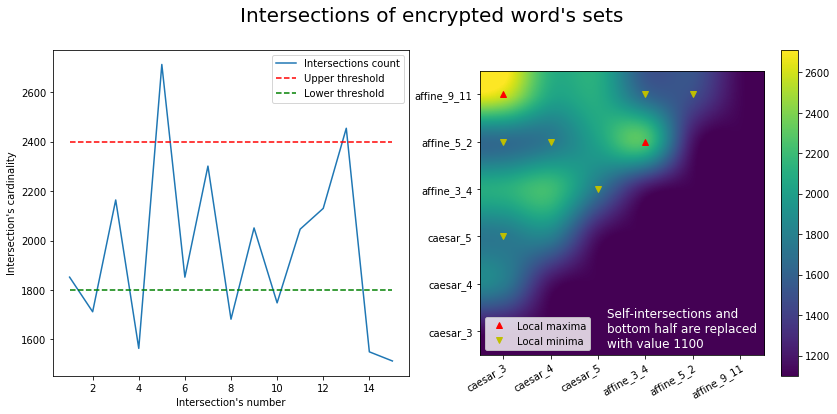

In [15]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Plotting graph of intersection's cardinalities
ax1.set_xlabel("Intersection's number")
ax1.set_ylabel("Intersection's cardinality")

ax1.plot(x_axis, intersections, label='Intersections count')
ax1.plot(x_axis, u_threshold_line, 'r--', label='Upper threshold')
ax1.plot(x_axis, l_threshold_line, 'g--', label='Lower threshold')

# Plotting colored image of inersection's cardinalities 
pos = ax2.imshow(intersections_map, interpolation='mitchell')
ax2.set_xticklabels([0] + [label for label in labels])  # 0 is dummy label
ax2.set_yticklabels([0] + [label for label in reversed(labels)])
ax2.text(2.20, 5.35, 'Self-intersections and \nbottom half are replaced \nwith value {}'.format(placeholder)
         , color='white', size=12)

# Mark local minima and maxima on second graph
# It is sad, but these numbers are magical :(
ax2.plot(  0, 0, 'r^', label='Local maxima')
ax2.plot(  3, 1, 'r^')
ax2.plot(  0, 3, 'yv', label='Local minima')
ax2.plot(  0, 1, 'yv', 1, 1, 'yv', 2, 2, 'yv'
         , 3, 0, 'yv', 4, 0, 'yv')

fig.colorbar(pos, ax=ax2)
plt.suptitle("Intersections of encrypted word's sets", size=20)
plt.setp(ax2.get_xticklabels(), rotation=30, ha='right', rotation_mode='anchor')
ax1.legend()
ax2.legend(loc='lower left')
plt.show()

#### Some inferences

As we can see on first graph, the most different sets are given by following methods:
- caesar_3 and caesar_5 (intersection 2)
- caesar_3 and affine_5_2 (intersection 4)
- caesar_4 and affine_5_2 (intersection 8)
- caesar_5 and affine_3_4 (intersection 10)
- affine_3_4 and affine_9_11 (intersection 14)
- affine_5_2 and affine_9_11 (intersection 15)

These intersections are marked with <span style='color:green'>▼</span> sign on the second graph as local minima.

From the first graph ensue that we have two intersections with relatively big cardinality:
- caesar_3 and affine_9_11 (intersection 5)
- affine_3_4 and affine_5_2 (intersection 13)

They are highlighted with <span style='color:red'>▲</span> sign on the second graph.

#### Classification

We have calculated 2 hash values: crc32 and custom one. Now it's time to put everything in Pandas DataFrame.

In [16]:
# Dictionaries to indexes mapping
dictionaries_map = map_to_numbers(1, d_caesar_3, d_caesar_4, d_caesar_5
                                     , d_affine_3_4, d_affine_5_2, d_affine_9_11)

In [17]:
data_frame = create_data_frame(dictionaries_map)

Time elapsed: 4 sec, 655165 msec


In [18]:
data_frame.head()

,Word,Crc32,Hash,Class
0,plqlvfkrrov,1280662977,57062,1
1,ylccb,3840766065,5478,1
2,glvrujdqlcdwlrqv,2596360828,166407,1
3,haklelwlrq,585160563,42873,1
4,phodqrpd,86869769,21944,1
